# Figure 6A. Plot rollout

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from itertools import combinations
from typing import Any

import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
import torch.nn.functional as functional
from torch.utils.data import random_split
from torch_geometric.data import DataLoader

from collab_env.data.file_utils import expand_path, get_project_root

In [25]:
from collab_env.gnn.gnn import get_adjcency_from_debug, plot_log_loss, train_rules_gnn, load_model, save_model, debug_result2prediction
from collab_env.gnn.gnn_definition import GNN, Lazy
from collab_env.sim.boids_gnn_temp.animal_simulation_from_data_old import visualize_graph_2sets, static_visualize_2sets

from collab_env.gnn.utility import dataset2testloader
from collab_env.gnn.plotting_utility import load_various_data, load_rollout
from itertools import product
from rich import print

### 1. Load rollout

In [26]:
torch.cuda.empty_cache()

In [27]:
with open(expand_path("./simulated_data/boid_single_species_basic_config.pt", get_project_root()), "rb") as f:
    config = torch.load(f)

print(config)

{
    'A': {
        'visual_range': 50,
        'centering_factor': 0.005,
        'min_distance': 15,
        'avoid_factor': 0.05,
        'matching_factor': 0.5,
        'margin': 5,
        'turn_factor': 10,
        'speed_limit': 7,
        'counts': 20,
        'independent': False
    }
}

In [49]:
data_names = ['boid_single_species_basic']#, 'boid_single_species_independent', # without food
              #'boid_food_basic_alignment', 'boid_food_basic_independent', # with food
              #'boid_food_strong'] # with food, strong influence
model_name = "vpluspplus_a"
model_type = "enhanced_gnn" # "original" /  / "enhanced_gnn"
spec = {
    "data_name": data_names[0],
    "model_type": model_type,
    "head": 3,
    "visual_range": 0.5,
    "seed": 0,
    "rollout_starting_frame": 5,
    "rollout_frames": 100,
    "noise": 0.0
}   

rollout_result = load_rollout(
    model_name,
    root_path = expand_path("./trained_models/", get_project_root()),
    **spec
)

2025-09-02 23:31:50.516 | DEBUG    | collab_env.gnn.plotting_utility:load_rollout:76 - Loading rollout from /Users/dima/git/collab-environment/trained_models/boid_single_species_basic_enhanced_gnn_vpluspplus_a_n0.0_h3_vr0.5_s0_rollout_5_frames_100.pkl


2025-09-02 23:31:50.559 | DEBUG    | collab_env.gnn.plotting_utility:load_rollout:89 - Loaded rollout from /Users/dima/git/collab-environment/trained_models/boid_single_species_basic_enhanced_gnn_vpluspplus_a_n0.0_h3_vr0.5_s0_rollout_5_frames_100.pkl.


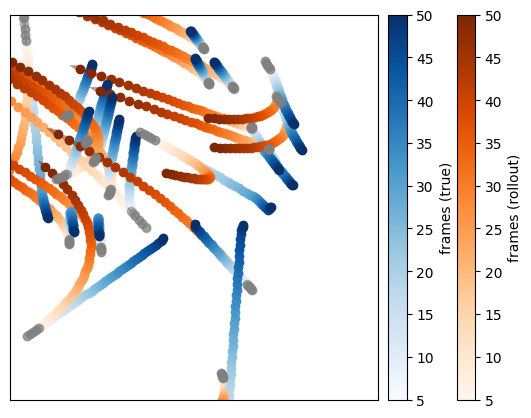

In [50]:
%matplotlib inline

file_id = 25 #25, 40

#m = 'boid_food_basic'

actual_pos, actual_vel, actual_acc, gnn_pos, gnn_vel, gnn_acc, frame_sets = debug_result2prediction(
                    rollout_result,
                    file_id = file_id, epoch_num = 0)


starting_frame = 0
rollout_starting_frame = 5
ending_frame = 50
ax = static_visualize_2sets(actual_pos[0], actual_vel[0], gnn_pos[0], gnn_vel[0],
                starting_frame = starting_frame, rollout_starting_frame = rollout_starting_frame, 
                            ending_frame = ending_frame)